In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error, f1_score

In [133]:
train_df=pd.read_csv('/kaggle/input/mse-2-ai-201-b-aiml-c/train.csv')
test_df=pd.read_csv('/kaggle/input/mse-2-ai-201-b-aiml-c/test.csv')

In [134]:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,79737.0,1165.818,483.7234,210.5411,80498.0,318.6288,0.9003,0.9905,0.7461,0.7372,2.2975,0.6587,A
1,81893.0,NaN,441.5179,237.5255,83087.0,322.9077,0.8430,NaN,0.7181,0.8098,1.8588,0.7314,B
2,82468.0,NaN,452.2654,232.5943,83212.0,324.0394,0.8576,0.9911,0.6277,0.8045,1.9444,0.7165,B
3,99270.0,1245.963,495.6917,255.7247,100359.0,355.5200,0.8567,0.9891,0.6966,0.8036,1.9384,NaN,A
4,70388.0,1044.665,426.7972,211.0762,71013.0,299.3673,0.8691,0.9912,0.7189,0.8105,2.0220,0.7014,B


In [135]:
test_df.head()

,id,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,1,65457,1025.784,421.3851,199.1137,66401,288.6909,0.8813,0.9858,0.7277,0.7817,2.1163,0.6851
1,2,73550,1076.886,433.8194,216.6902,74260,306.0176,0.8663,0.9904,0.7065,0.7970,2.0020,0.7054
2,3,80519,1105.276,435.6902,236.2395,81250,320.1874,0.8402,0.9910,0.7417,0.8283,1.8443,0.7349
3,4,93323,1244.527,519.3040,229.4401,94506,344.7064,0.8971,0.9875,0.7532,0.7572,2.2634,0.6638
4,5,83005,1234.751,539.6816,196.7117,83725,325.0927,0.9312,0.9914,0.5750,0.6842,2.7435,0.6024


In [136]:
train_df.isnull().sum()

Area                 170
Perimeter            275
Major_Axis_Length    248
Minor_Axis_Length    233
Convex_Area          150
Equiv_Diameter       133
Eccentricity         109
Solidity             270
Extent               224
Roundness            252
Aspect_Ration         97
Compactness          286
Class                272
dtype: int64

In [137]:
train_df=train_df.ffill().bfill()

In [138]:
train_df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2024 non-null   float64
 1   Perimeter          2024 non-null   float64
 2   Major_Axis_Length  2024 non-null   float64
 3   Minor_Axis_Length  2024 non-null   float64
 4   Convex_Area        2024 non-null   float64
 5   Equiv_Diameter     2024 non-null   float64
 6   Eccentricity       2024 non-null   float64
 7   Solidity           2024 non-null   float64
 8   Extent             2024 non-null   float64
 9   Roundness          2024 non-null   float64
 10  Aspect_Ration      2024 non-null   float64
 11  Compactness        2024 non-null   float64
 12  Class              2024 non-null   object 
dtypes: float64(12), object(1)
memory usage: 205.7+ KB


In [140]:
test_df.isnull().sum()

id                   0
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
dtype: int64

In [141]:
test_ids=test_df["id"]
test_final=test_df.drop("id",axis=1)
test_final.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,65457,1025.784,421.3851,199.1137,66401,288.6909,0.8813,0.9858,0.7277,0.7817,2.1163,0.6851
1,73550,1076.886,433.8194,216.6902,74260,306.0176,0.8663,0.9904,0.7065,0.7970,2.0020,0.7054
2,80519,1105.276,435.6902,236.2395,81250,320.1874,0.8402,0.9910,0.7417,0.8283,1.8443,0.7349
3,93323,1244.527,519.3040,229.4401,94506,344.7064,0.8971,0.9875,0.7532,0.7572,2.2634,0.6638
4,83005,1234.751,539.6816,196.7117,83725,325.0927,0.9312,0.9914,0.5750,0.6842,2.7435,0.6024


In [142]:
x=train_df.drop("Class",axis=1)
y=train_df["Class"]

In [143]:
le=LabelEncoder()
y_lebel=le.fit_transform(y)

In [144]:
y.head()

0    A
1    B
2    B
3    A
4    B
Name: Class, dtype: object

In [145]:
y_lebel

array([0, 1, 1, ..., 0, 0, 0])

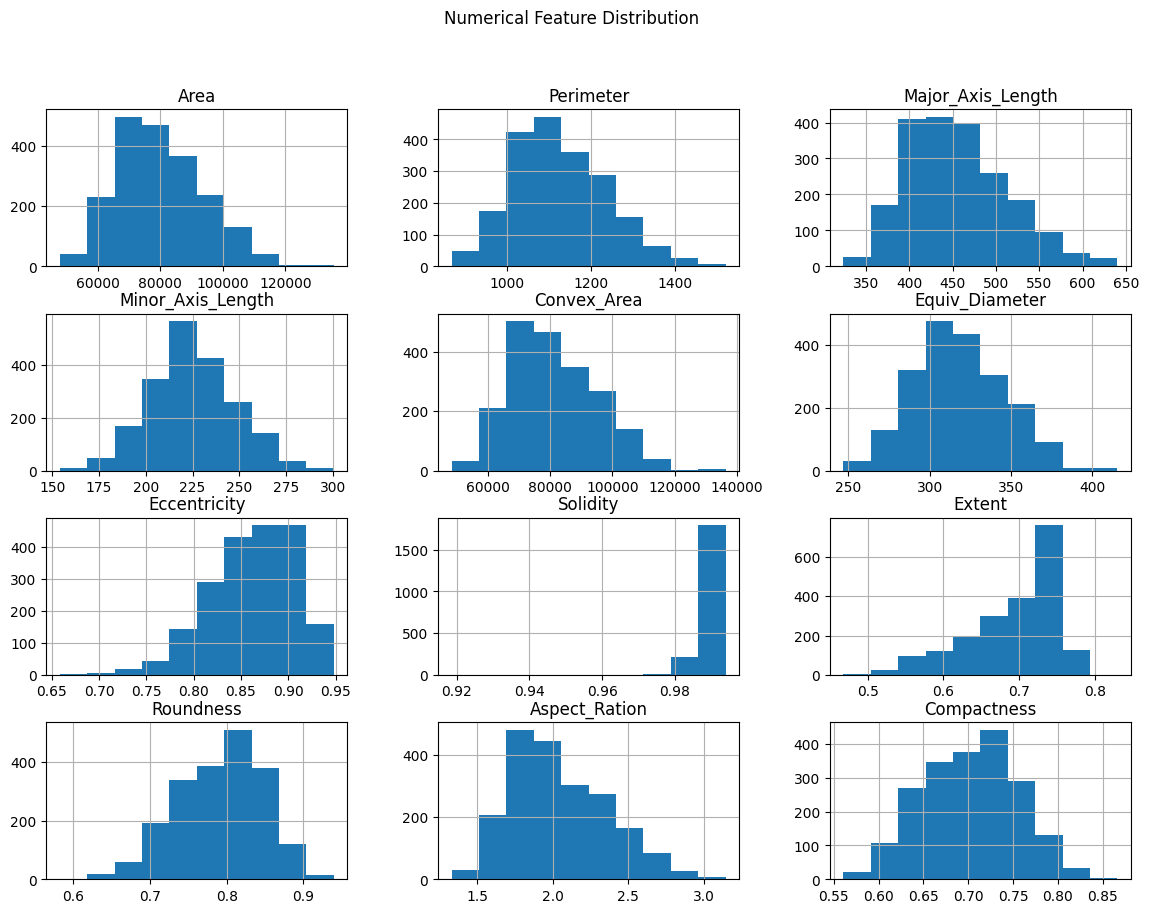

In [146]:
nums_cols=x.select_dtypes(include=["int64","float64"]).columns
x[nums_cols].hist(figsize=(14,10))
plt.suptitle("Numerical Feature Distribution")
plt.show()

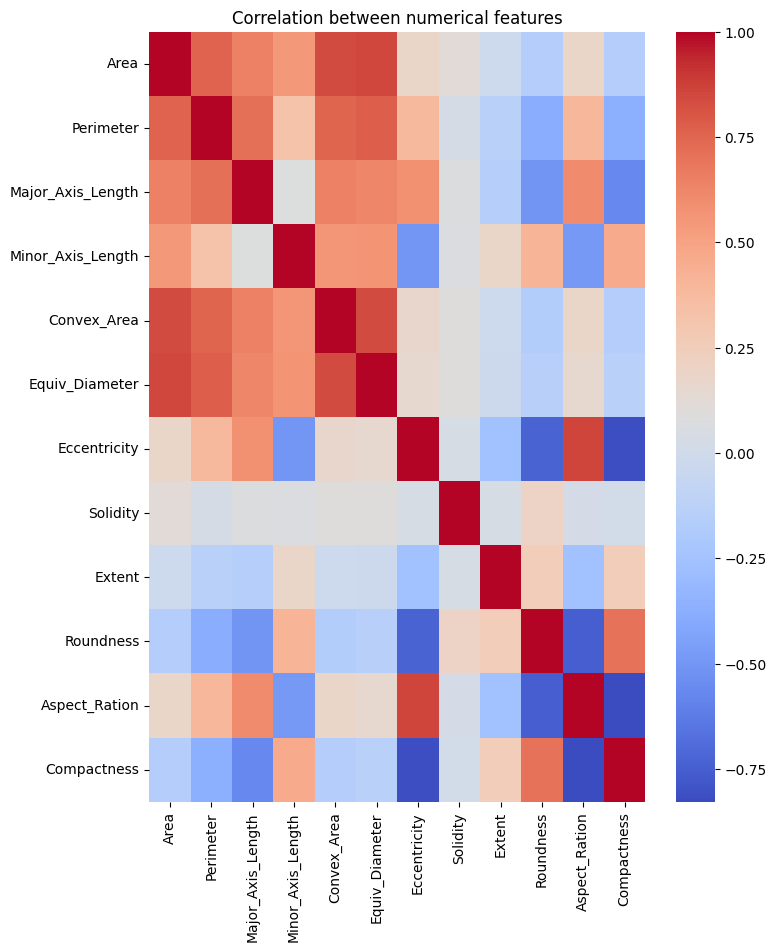

In [147]:
plt.figure(figsize=(8,10))
sns.heatmap(train_df[nums_cols].corr(),annot=False,cmap="coolwarm")
plt.title("Correlation between numerical features")
plt.show()

In [148]:
numerical_pipe=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

# categorical_pipe=Pipeline(steps=[
#     ("imputer",SimpleImputer(strategy="most_frequent")),
#     ('encoder',OneHotEncoder(handle_unknown='ignore'))
# ])

preprocessor=ColumnTransformer(transformers=[
    ("nums",numerical_pipe,nums_cols)
    # ("cat",categorical_pipe,cat_cols)
])

In [149]:
x_train,x_val,y_train,y_val=train_test_split(x,y_lebel,
                            test_size=0.2,
                            random_state=42,
                            stratify=y_lebel)


In [150]:
x_train

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
921,71531.0,1006.504,380.7039,240.1967,72073.0,303.3871,0.8657,0.9925,0.7183,0.7946,1.5850,0.7927
520,84842.0,1130.448,429.4275,253.5051,86185.0,328.6703,0.8072,0.9844,0.6864,0.8343,1.6940,0.7654
1411,67562.0,1017.263,383.6983,228.6981,68465.0,293.2961,0.8030,0.9868,0.6326,0.8204,1.6777,0.7644
452,75580.0,1088.163,441.7813,218.4192,76271.0,310.2119,0.8692,0.9909,0.7582,0.8021,2.0226,0.7022
294,73223.0,1052.517,417.8197,224.9094,74367.0,305.3366,0.8428,0.9846,0.6679,0.8306,1.8577,0.7308
...,...,...,...,...,...,...,...,...,...,...,...,...
1782,73320.0,1082.988,447.8136,209.4630,74067.0,305.5387,0.8839,0.9872,0.5872,0.7856,2.1379,0.6823
1036,88358.0,949.800,387.4814,193.9067,89445.0,335.4115,0.9428,0.9878,0.7375,0.6374,2.9988,0.5768
508,88283.0,1052.565,454.1398,248.5042,88978.0,335.2692,0.8370,0.9922,0.6691,0.8429,1.8275,0.7383
536,74353.0,1120.547,468.8578,203.2192,75348.0,307.6836,0.9012,0.9868,0.7693,0.7441,1.9191,0.7205


In [151]:
model=Pipeline(steps=[
    ("preprocessing",preprocessor),
    ("classifier",RandomForestClassifier(n_estimators=200,random_state=42))
])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [152]:
y_pred=model.predict(x_val)
y_proba=model.predict_proba(x_val)[:,1]

In [153]:
accuracy=accuracy_score(y_val,y_pred)
print(f"Accuracy of model = {accuracy:.2f}")

Accuracy of model = 0.84


In [154]:
cm=confusion_matrix(y_pred,y_val)
print(cm)

[[165  33]
 [ 33 174]]


In [156]:
roc_auc=roc_auc_score(y_val,y_pred,multi_class='ovr')
print(roc_auc)

0.8369565217391304


In [157]:
f1=f1_score(y_val,y_pred,average='weighted')
print(f1)

0.837037037037037


In [159]:
mean_square=mean_squared_error(y_val,y_pred,squared=False)
print(mean_square)

0.4036867138796656


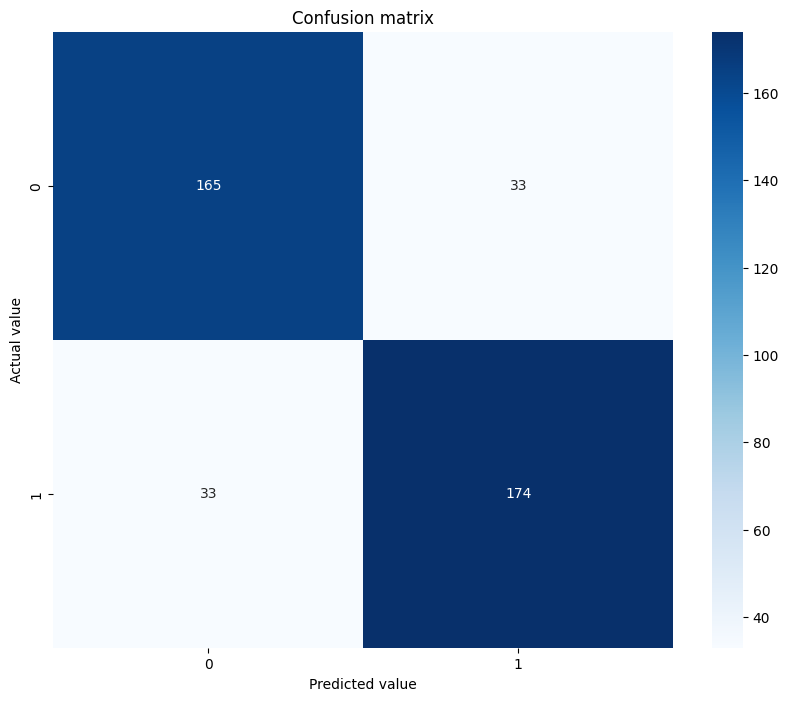

In [160]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

In [161]:
classification_report=classification_report(y_val,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       198
           1       0.84      0.84      0.84       207

    accuracy                           0.84       405
   macro avg       0.84      0.84      0.84       405
weighted avg       0.84      0.84      0.84       405



In [162]:
test_predict=model.predict(test_final)
final_prediction=le.inverse_transform(test_predict)

In [163]:
submission=pd.DataFrame({
    "id":test_ids,
    "Class":final_prediction
})

In [164]:
submission.head()

,id,Class
0,1,A
1,2,B
2,3,B
3,4,A
4,5,A


In [165]:
submission.to_csv("Submission.csv",index=False)
print("Final csv has been created Successfully")

Final csv has been created Successfully
